In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from IPython.display import display, HTML
import warnings
# warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data_1000.csv')
df.head()

,title,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres,link
0,Fireproof,Eric Wilson,English,4.47,"52,871",616,Thomas Nelson Publishers,2008.0,284.0,Paperback,"['Christian', 'Christian Fiction', 'Fiction', ...",https://www.goodreads.com/book/show/3412815-fi...
1,Crank,Ellen Hopkins,English,4.16,"139,194","8,919",Margaret K. McElderry Books,2004.0,537.0,Paperback,"['Young Adult', 'Poetry', 'Fiction', 'Contempo...",https://www.goodreads.com/book/show/270730.Crank
2,الحرافيش,Naguib Mahfouz,Arabic,4.38,"16,833","2,423",دار الشروق,2006.0,599.0,Paperback,"['Novels', 'Fiction', 'Literature', 'Egypt', '...",https://www.goodreads.com/book/show/5295735
3,"He, She and It",Marge Piercy,English,3.98,"5,538",466,Fawcett,1993.0,448.0,Mass Market Paperback,"['Science Fiction', 'Fiction', 'Dystopia', 'Ro...",https://www.goodreads.com/book/show/788331.He_...
4,Independent People,Halldór Laxness,English,4.15,"11,334","1,580",Vintage,1997.0,482.0,Paperback,"['Fiction', 'Classics', 'Historical Fiction', ...",https://www.goodreads.com/book/show/77287.Inde...


In [4]:
df = df.drop(['link'], axis=1)
df.head()

,title,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres
0,Fireproof,Eric Wilson,English,4.47,"52,871",616,Thomas Nelson Publishers,2008.0,284.0,Paperback,"['Christian', 'Christian Fiction', 'Fiction', ..."
1,Crank,Ellen Hopkins,English,4.16,"139,194","8,919",Margaret K. McElderry Books,2004.0,537.0,Paperback,"['Young Adult', 'Poetry', 'Fiction', 'Contempo..."
2,الحرافيش,Naguib Mahfouz,Arabic,4.38,"16,833","2,423",دار الشروق,2006.0,599.0,Paperback,"['Novels', 'Fiction', 'Literature', 'Egypt', '..."
3,"He, She and It",Marge Piercy,English,3.98,"5,538",466,Fawcett,1993.0,448.0,Mass Market Paperback,"['Science Fiction', 'Fiction', 'Dystopia', 'Ro..."
4,Independent People,Halldór Laxness,English,4.15,"11,334","1,580",Vintage,1997.0,482.0,Paperback,"['Fiction', 'Classics', 'Historical Fiction', ..."


In [3]:
data = df.copy()

In [4]:
y = data['avg_ratings']
X = data.drop(['avg_ratings'], axis=1)
y

0      4.47
1      4.16
2      4.38
3      3.98
4      4.15
       ... 
995    3.41
996    4.00
997    3.74
998    4.00
999    4.29
Name: avg_ratings, Length: 1000, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
# check for doublications
print(X_train.duplicated().any())
print(X_test.duplicated().any())
print(X_val.duplicated().any())

False
False
False


In [8]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(X_val.isnull().sum())

title             0
author            0
language         20
ratings_count     0
reviews_count     0
publisher        24
publish_year      1
num_pages         8
page_format       3
genres            0
link              0
dtype: int64
title            0
author           0
language         3
ratings_count    0
reviews_count    0
publisher        9
publish_year     2
num_pages        3
page_format      2
genres           0
link             0
dtype: int64
title            0
author           0
language         6
ratings_count    0
reviews_count    0
publisher        8
publish_year     1
num_pages        3
page_format      0
genres           0
link             0
dtype: int64


In [9]:
# Khởi tạo Label Encoder
le = LabelEncoder()

# Áp dụng Label Encoder cho cột "Title", "author", "language", "publisher", "page_format"
# df['author'] = le.fit_transform(df['author'])
# df['language'] = le.fit_transform(df['language'])
# df['publisher'] = le.fit_transform(df['publisher'])
# df['page_format'] = le.fit_transform(df['page_format'])

fit = le.fit(X_train['author'])
X_train['author'] = fit.transform(X_train['author'])
X_test['author'] = fit.transform(X_test['author'])
X_val['author'] = fit.transform(X_val['author'])

# In kết quả
X_train.head()

ValueError: y contains previously unseen labels: 'Kim Harrison'

In [70]:
df.drop(['link', 'title'], axis=1, inplace=True)
df.head()

,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres
0,239,2,4.47,"52,871",616,456,2008.0,284.0,8,"['Christian', 'Christian Fiction', 'Fiction', ..."
1,229,2,4.16,"139,194","8,919",286,2004.0,537.0,8,"['Young Adult', 'Poetry', 'Fiction', 'Contempo..."
2,578,0,4.38,"16,833","2,423",532,2006.0,599.0,8,"['Novels', 'Fiction', 'Literature', 'Egypt', '..."
3,517,2,3.98,"5,538",466,164,1993.0,448.0,6,"['Science Fiction', 'Fiction', 'Dystopia', 'Ro..."
4,289,2,4.15,"11,334","1,580",487,1997.0,482.0,8,"['Fiction', 'Classics', 'Historical Fiction', ..."


In [71]:
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))

# df['genres'][3]

In [72]:
df['genres'] = df['genres'].apply(lambda x: sorted(x))
df['genres'] = df['genres'].apply(lambda x: ','.join(x))
df.head()

,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres
0,239,2,4.47,"52,871",616,456,2008.0,284.0,8,"Christian,Christian Fiction,Contemporary,Faith..."
1,229,2,4.16,"139,194","8,919",286,2004.0,537.0,8,"Banned Books,Contemporary,Fiction,High School,..."
2,578,0,4.38,"16,833","2,423",532,2006.0,599.0,8,"Africa,Classics,Egypt,Egyptian Literature,Fict..."
3,517,2,3.98,"5,538",466,164,1993.0,448.0,6,"Cyberpunk,Dystopia,Fantasy,Feminism,Fiction,Je..."
4,289,2,4.15,"11,334","1,580",487,1997.0,482.0,8,"20th Century,Classics,Fiction,Historical,Histo..."


In [73]:
df['genres'] = le.fit_transform(df['genres'])
df.head()

,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres
0,239,2,4.47,"52,871",616,456,2008.0,284.0,8,723
1,229,2,4.16,"139,194","8,919",286,2004.0,537.0,8,644
2,578,0,4.38,"16,833","2,423",532,2006.0,599.0,8,460
3,517,2,3.98,"5,538",466,164,1993.0,448.0,6,835
4,289,2,4.15,"11,334","1,580",487,1997.0,482.0,8,80


In [74]:
df['ratings_count'] = df['ratings_count'].apply(lambda x: int(x.replace(',', '')))
df['reviews_count'] = df['reviews_count'].apply(lambda x: int(x.replace(',', '')))
df['num_pages'] = df['num_pages'].astype(float)
df['publish_year'] = df['publish_year'].astype(float)

df.head()

,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres
0,239,2,4.47,52871,616,456,2008.0,284.0,8,723
1,229,2,4.16,139194,8919,286,2004.0,537.0,8,644
2,578,0,4.38,16833,2423,532,2006.0,599.0,8,460
3,517,2,3.98,5538,466,164,1993.0,448.0,6,835
4,289,2,4.15,11334,1580,487,1997.0,482.0,8,80


In [75]:
def extracting(df):
    # Khởi tạo Label Encoder
    le = LabelEncoder()
    df['author'] = le.fit_transform(df['author'])
    df['language'] = le.fit_transform(df['language'])
    df['publisher'] = le.fit_transform(df['publisher'])
    df['page_format'] = le.fit_transform(df['page_format'])

    df.drop(['link', 'title'], axis=1, inplace=True)
    df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))

    df['genres'] = df['genres'].apply(lambda x: sorted(x))
    df['genres'] = df['genres'].apply(lambda x: ','.join(x))

    df['genres'] = le.fit_transform(df['genres'])

    df['ratings_count'] = df['ratings_count'].apply(lambda x: int(x.replace(',', '')))
    df['reviews_count'] = df['reviews_count'].apply(lambda x: int(x.replace(',', '')))
    df['num_pages'] = df['num_pages'].astype(float)
    df['publish_year'] = df['publish_year'].astype(float)
    
    return df

In [76]:
df.isnull().sum()

author            0
language          0
avg_ratings       0
ratings_count     0
reviews_count     0
publisher         0
publish_year      4
num_pages        14
page_format       0
genres            0
dtype: int64

In [77]:
# data = df.copy()

In [78]:
# y = data['avg_ratings']
# X = data.drop(['avg_ratings'], axis=1)
# y

0      4.47
1      4.16
2      4.38
3      3.98
4      4.15
       ... 
995    3.41
996    4.00
997    3.74
998    4.00
999    4.29
Name: avg_ratings, Length: 1000, dtype: float64

In [79]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [81]:
def fillMissingData(data_train, data_val, data_test):
    eod_columns = ['publish_year', 'num_pages']
    eod_values = [data_train[col].mean() + 3*data_train[col].std() for col in eod_columns]
    for col, val in zip(eod_columns, eod_values):
        data_train[col].fillna(val, inplace=True)
        data_val[col].fillna(val, inplace=True)
        data_test[col].fillna(val, inplace=True)
    return data_train, data_val, data_test

In [82]:
def plotDistribution(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    axes = axes.flatten()
    for col, ax in zip(columns, axes):
        ax.hist(data[col], bins=50)
        ax.set_title(col)
    plt.show()

def plotCorrelation(data, columns):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(data[columns].corr())
    plt.xticks(range(len(columns)), columns, rotation=90)
    plt.yticks(range(len(columns)), columns)
    plt.show()

def plotScatter(data, columns, target):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.scatter(data[col], data[target])
        ax.set_title(col)
    plt.show()

def plotBar(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.bar(data[col].value_counts().index, data[col].value_counts())
        ax.set_title(col)
    plt.show()

def plotPie(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.pie(data[col].value_counts(), labels=data[col].value_counts().index, autopct='%1.1f%%')
        ax.set_title(col)
    plt.show()

def plotHeatmap(data, columns):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(data[columns].corr())
    plt.xticks(range(len(columns)), columns, rotation=90)
    plt.yticks(range(len(columns)), columns)
    plt.show()

def plotHistogram(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.hist(data[col], bins=30)
        ax.set_title(col)
    plt.show()

def plotCount(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.bar(data[col].value_counts().index, data[col].value_counts())
        ax.set_title(col)
    plt.show()

def plotBox(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.boxplot(data[col])
        ax.set_title(col)
    plt.show()

In [83]:
def printDescription(data, columns):
    for col in columns:
        print(data[col].describe())

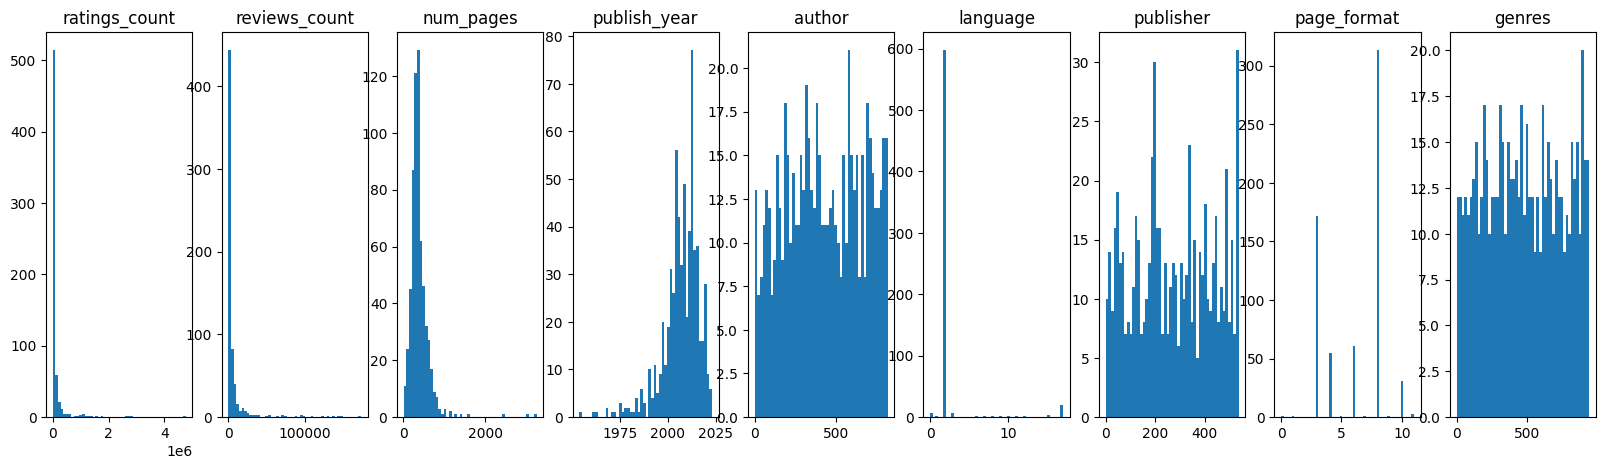

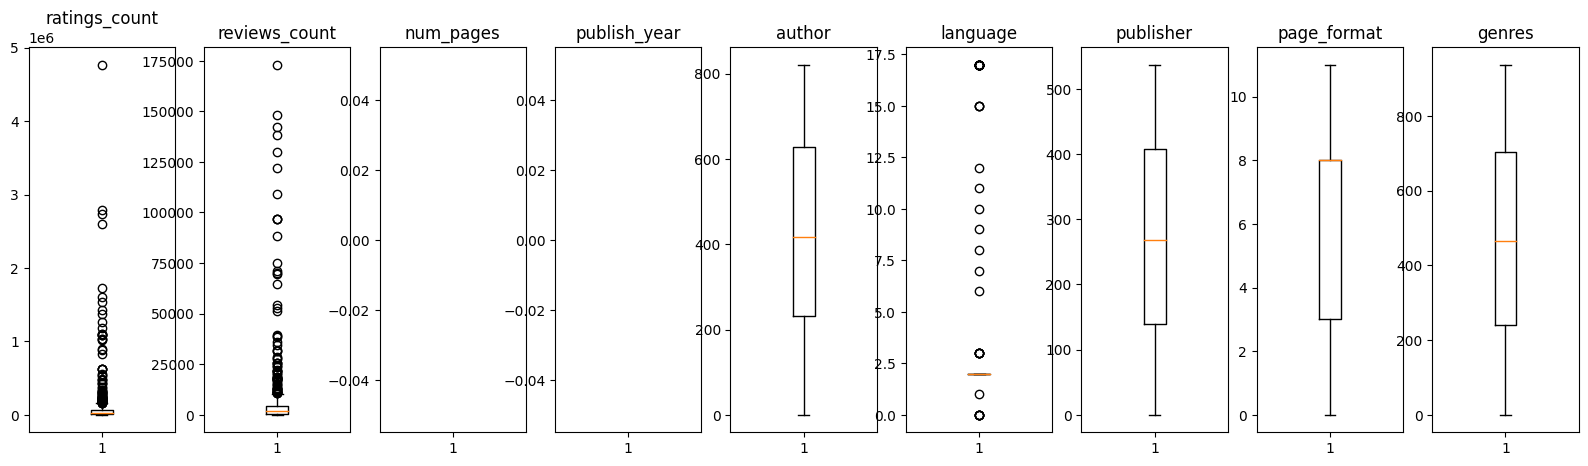

count    6.400000e+02
mean     1.102113e+05
std      3.329993e+05
min      0.000000e+00
25%      1.006350e+04
50%      2.676000e+04
75%      7.064325e+04
max      4.767728e+06
Name: ratings_count, dtype: float64
count       640.000000
mean       6564.946875
std       18056.836528
min           0.000000
25%         584.250000
50%        1685.500000
75%        4513.250000
max      173028.000000
Name: reviews_count, dtype: float64
count     632.000000
mean      384.338608
std       255.690456
min         5.000000
25%       259.750000
50%       344.000000
75%       448.000000
max      3248.000000
Name: num_pages, dtype: float64
count     639.000000
mean     2006.845070
std         9.519627
min      1954.000000
25%      2003.000000
50%      2008.000000
75%      2013.000000
max      2023.000000
Name: publish_year, dtype: float64
count    640.000000
mean     426.406250
std      233.679516
min        0.000000
25%      230.750000
50%      417.500000
75%      627.000000
max      821.000000
Name:

In [84]:
# fillMissingData(X_train, X_val, X_test)
plotDistribution(X_train, ['ratings_count', 'reviews_count', 'num_pages', 'publish_year', 'author', 'language', 'publisher', 'page_format', 'genres'])
plotBox(X_train, ['ratings_count', 'reviews_count', 'num_pages', 'publish_year', 'author', 'language', 'publisher', 'page_format', 'genres'])
printDescription(X_train, ['ratings_count', 'reviews_count', 'num_pages', 'publish_year', 'author', 'language', 'publisher', 'page_format', 'genres'])

In [85]:
skewedDists = ['ratings_count', 'reviews_count', 'num_pages', 'language']
isUpper_bridge = [True, True, True, True]
skewedDists = {col: isUpper_bridge for col, isUpper_bridge in zip(skewedDists, isUpper_bridge)}
gaussionDists = ['publish_year']
isUpper_boundary = [False]
gaussionDists = {col: isUpper_boundary for col, isUpper_boundary in zip(gaussionDists, isUpper_boundary)}

In [86]:
def outliers_handle(data, variable, isShow=False):
    upper_boundary=data[variable].mean() + 3 * data[variable].std()
    lower_boundary=data[variable].mean() - 3 * data[variable].std()
    if isShow:
        print(f"upper_boundary: {upper_boundary}")
        print(f"lower_boundary: {lower_boundary}")
        print(f"mean: {data[variable].mean()}")
    return lower_boundary, upper_boundary

def outliers_handle_skewed(data, variable, isShow=False):
    IQR=data[variable].quantile(0.75) - data[variable].quantile(0.25)
    lower_bridge=data[variable].quantile(0.25) - (IQR*3)
    upper_bridge=data[variable].quantile(0.75) + (IQR*3)
    if isShow:
        print(f"lower_bridge: {lower_bridge}")
        print(f"upper_bridge: {upper_bridge}")
    return lower_bridge, upper_bridge

In [87]:
minMaxScaler = MinMaxScaler()
maxAbsScaler = MaxAbsScaler()
standardScaler = StandardScaler()
robustScaler = RobustScaler()
normalizer = Normalizer()
quantileTransformer = QuantileTransformer(n_quantiles=640)
powerTransformer = PowerTransformer()
scalerArr = [minMaxScaler, maxAbsScaler, standardScaler, robustScaler, normalizer, quantileTransformer, powerTransformer]

In [88]:
def scaleData(data_train, data_val, data_test, scaler):
    scaler.fit(data_train)
    data_train = pd.DataFrame(scaler.transform(data_train.copy()), columns=data_train.columns)
    data_val = pd.DataFrame(scaler.transform(data_val.copy()), columns=data_val.columns)
    data_test = pd.DataFrame(scaler.transform(data_test.copy()), columns=data_test.columns)
    # plotDistribution(data_train, ['ratings_count', 'reviews_count', 'num_pages', 'publish_year', 'title', 'author', 'language', 'publisher', 'page_format', 'genres'], scaler.__class__.__name__)
    # plotBox(data_train, ['ratings_count', 'reviews_count', 'num_pages', 'publish_year', 'title', 'author', 'language', 'publisher', 'page_format', 'genres'])
    return data_train, data_val, data_test

In [89]:
def handleOutlier(data_train, data_val, data_test):
    for col in skewedDists:
        lower_bridge, upper_bridge = outliers_handle_skewed(data_train, col)
        if skewedDists[col]:
            data_train.loc[data_train[col]>=upper_bridge,col]=upper_bridge
            data_val.loc[data_val[col]>=upper_bridge,col]=upper_bridge
            data_test.loc[data_test[col]>=upper_bridge,col]=upper_bridge
        else:
            data_train.loc[data_train[col]<=lower_bridge,col]=lower_bridge
            data_val.loc[data_val[col]<=lower_bridge,col]=lower_bridge
            data_test.loc[data_test[col]<=lower_bridge,col]=lower_bridge
        
    for col in gaussionDists:
        lower_boundary, upper_boundary = outliers_handle(data_train, col)
        if gaussionDists[col]:
            data_train.loc[data_train[col]>=upper_boundary,col]=upper_boundary
            data_val.loc[data_val[col]>=upper_boundary,col]=upper_boundary
            data_test.loc[data_test[col]>=upper_boundary,col]=upper_boundary
        else:
            data_train.loc[data_train[col]<=lower_boundary,col]=lower_boundary
            data_val.loc[data_val[col]<=lower_boundary,col]=lower_boundary
            data_test.loc[data_test[col]<=lower_boundary,col]=lower_boundary
    return data_train, data_val, data_test

In [90]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def featureSelection(X, y): 
    X_kbest = SelectKBest(f_classif, k = 5).fit(X, y)
    ix = X_kbest.get_support() 
    data = pd.DataFrame(X_kbest.transform(X), columns = X.columns.values[ix])
    print(data.columns.values)
    return data.columns.values

In [91]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

def featureSelection1(X, y):
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=5, step=1)
    selector = selector.fit(X, y)
    ix = selector.get_support() 
    data = pd.DataFrame(selector.transform(X), columns = X.columns.values[ix])
    print(data.columns.values)
    return data.columns.values    

In [92]:
def preprocessor(X_train, X_val, X_test):
    X_train, X_val, X_test = fillMissingData(X_train, X_val, X_test)
    X_train, X_val, X_test = handleOutlier(X_train, X_val, X_test)
    X_train, X_val, X_test = scaleData(X_train, X_val, X_test, powerTransformer)
    # for scaler in scalerArr:
    #     scaleData(X_train, X_val, X_test, scaler)
    return X_train, X_val, X_test

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


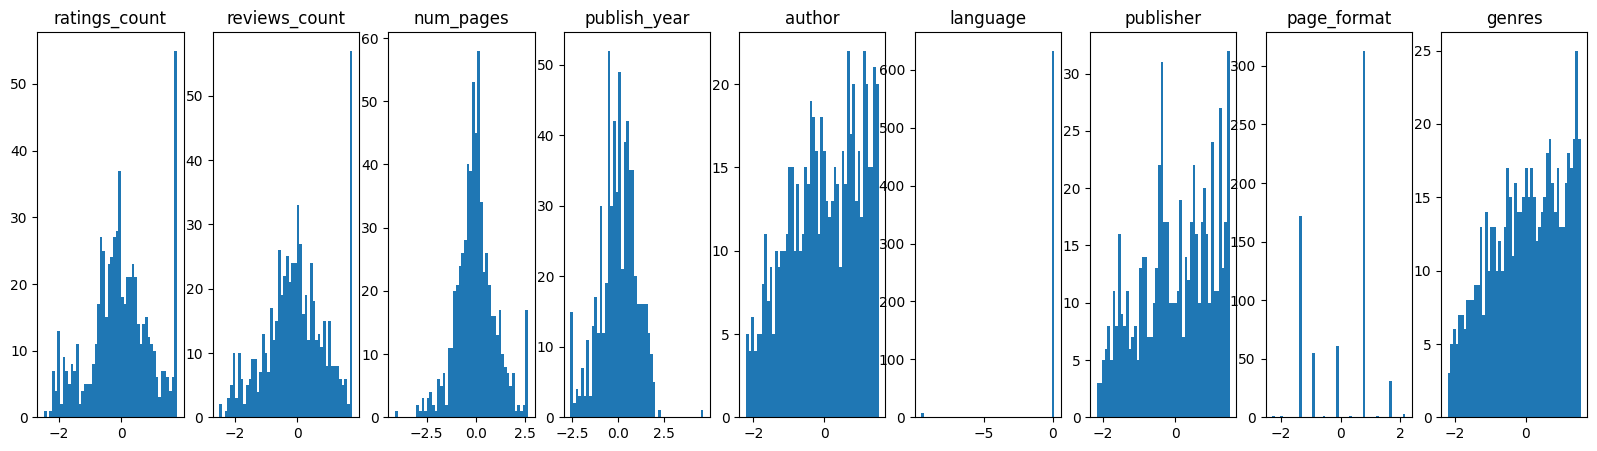

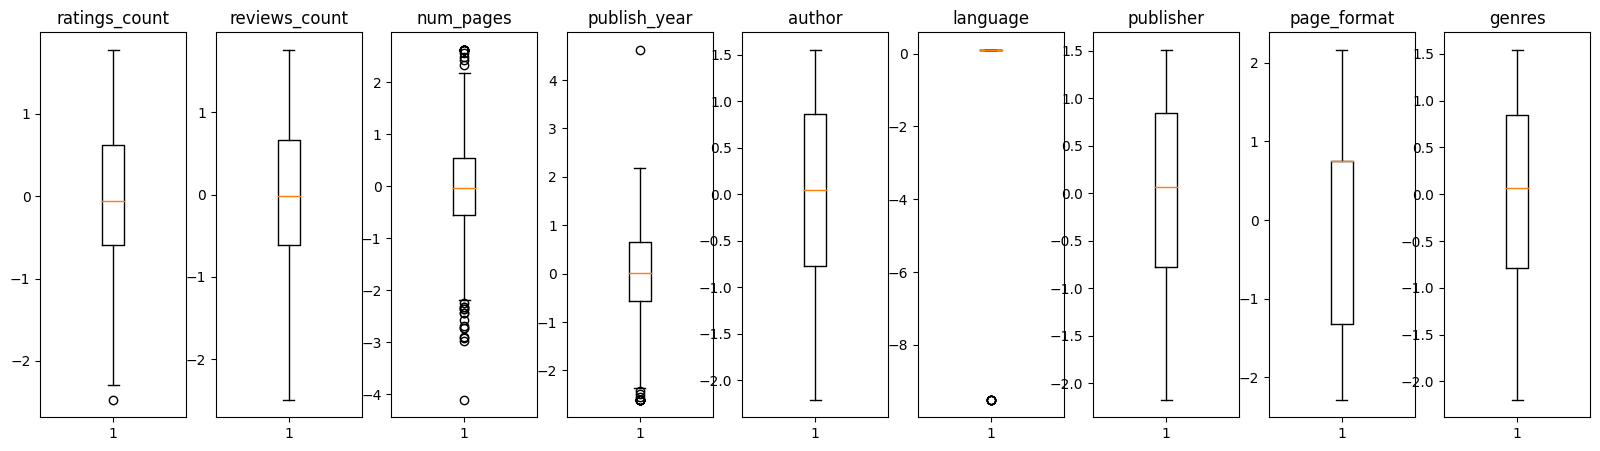

In [93]:
X_train, X_val, X_test = preprocessor(X_train, X_val, X_test)
plotDistribution(X_train, ['ratings_count', 'reviews_count', 'num_pages', 'publish_year', 'author', 'language', 'publisher', 'page_format', 'genres'])
plotBox(X_train, ['ratings_count', 'reviews_count', 'num_pages', 'publish_year', 'author', 'language', 'publisher', 'page_format', 'genres'])

In [94]:
def selectFeatures(X_train, y_train, X_val, X_test):
    featureArray = featureSelection(X_train, y_train)
    X_train = X_train[featureArray]
    X_val = X_val[featureArray]
    X_test = X_test[featureArray]
    return X_train, X_val, X_test
# ['author' 'ratings_count' 'reviews_count' 'num_pages' 'page_format']
# ['language' 'ratings_count' 'reviews_count' 'publish_year' 'num_pages']
# ['ratings_count' 'reviews_count' 'num_pages' 'page_format' 'genres']
# ['language' 'ratings_count' 'reviews_count' 'publish_year' 'num_pages']

In [95]:
def proccessing(file_path):
    df = pd.read_csv(file_path)
    df = extracting(df)
    data = df.copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    X_train, X_val, X_test = preprocessor(X_train, X_val, X_test)
    # X_train, X_val, X_test = selectFeatures(X_train, y_train, X_val, X_test)
    X_train, X_val, X_test = selectFeatures(X_train, y_train, X_val, X_test)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [96]:
X_train, X_val, X_test, y_train, y_val, y_test = proccessing('data_10000.csv')
X_train.head()

['author' 'ratings_count' 'reviews_count' 'num_pages' 'page_format']


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,author,ratings_count,reviews_count,num_pages,page_format
0,1.492029,0.330963,0.808908,-0.741921,-1.326814
1,-0.312299,-0.696396,-0.730338,0.008561,0.745634
2,-0.395190,1.777190,1.761440,-1.887921,-1.326814
3,-1.257119,1.777190,1.761440,0.121312,-1.326814
4,-1.597688,0.173303,-0.058632,-1.996853,0.745634
